# LAB 05.02 - Model evaluation

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [44]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as mateo.reyesu@udea.edu.co... please wait

-------------
using course session ai4eng.v1.udea.r3::2025.2
success!! you are logged in
-------------


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [3]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 87, 74,  3, 97],
       [ 2, 82, 45, 72,  9],
       [ 3, 94, 99, 76, 67],
       [ 4, 11, 73, 70, 21],
       [ 5, 61, 37, 66, 41],
       [ 6,  5, 31, 15, 56],
       [ 7, 12, 57, 45, 84],
       [ 8, 96, 86, 83, 83],
       [ 9, 39, 42, 11, 38],
       [10, 28, 91, 17, 87],
       [11, 79, 86, 57, 36],
       [12, 58, 52, 26, 61],
       [13, 47, 44, 38, 93],
       [14, 82, 31, 86, 98],
       [15, 62, 81, 60, 90],
       [16, 13, 19,  9, 70],
       [17, 10, 69, 11, 24],
       [18, 46, 18, 28, 68],
       [19, 65, 56, 63, 86]])

In [4]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2, 82, 45, 72,  9],
       [ 4, 11, 73, 70, 21],
       [ 5, 61, 37, 66, 41]])

In [5]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [87,  3],
       [82, 72],
       [94, 76],
       [11, 70],
       [61, 66],
       [ 5, 15],
       [12, 45],
       [96, 83],
       [39, 11],
       [28, 17],
       [79, 57],
       [58, 26],
       [47, 38],
       [82, 86],
       [62, 60],
       [13,  9],
       [10, 11],
       [46, 28],
       [65, 63]])

In [6]:
x[ridxs][:, cidxs]

array([[82, 72],
       [11, 70],
       [61, 66]])

and the dimensions of the array are accessible through `len` and `shape`

In [7]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [8]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 87, 74,  3, 97],
       [ 2, 82, 45, 72,  9]])

In [9]:
x[3:]

array([[ 3, 94, 99, 76, 67],
       [ 4, 11, 73, 70, 21],
       [ 5, 61, 37, 66, 41],
       [ 6,  5, 31, 15, 56],
       [ 7, 12, 57, 45, 84],
       [ 8, 96, 86, 83, 83],
       [ 9, 39, 42, 11, 38],
       [10, 28, 91, 17, 87],
       [11, 79, 86, 57, 36],
       [12, 58, 52, 26, 61],
       [13, 47, 44, 38, 93],
       [14, 82, 31, 86, 98],
       [15, 62, 81, 60, 90],
       [16, 13, 19,  9, 70],
       [17, 10, 69, 11, 24],
       [18, 46, 18, 28, 68],
       [19, 65, 56, 63, 86]])

we can do the same thing with vectors

In [10]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [11]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [12]:
np.random.permutation(v)

array([101, 111, 105, 102, 114, 110, 117, 118, 112, 109, 119, 104, 100,
       113, 103, 108, 107, 116, 115, 106])

or the first natural numbers

In [13]:
p = np.random.permutation(20)
p

array([13, 11, 18, 16,  7,  3,  6,  8,  4, 10, 17, 12,  9,  2,  5,  1, 15,
        0, 14, 19])

how do you interpret this?

In [14]:
v[p[5:]]

array([103, 106, 108, 104, 110, 117, 112, 109, 102, 105, 101, 115, 100,
       114, 119])

In [15]:
x[p[:5]]

array([[13, 47, 44, 38, 93],
       [11, 79, 86, 57, 36],
       [18, 46, 18, 28, 68],
       [16, 13, 19,  9, 70],
       [ 7, 12, 57, 45, 84]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct`
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [16]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [17]:
import numpy as np

def split_data(X, y, pct):
    # Verifica que X y y tengan el mismo tamaño
    assert len(X) == len(y), "X and y must have the same length"
    assert 0 < pct < 1, "pct must be in the (0,1) interval"

    # Crea una permutación aleatoria de los índices
    permutation = np.random.permutation(len(X))

    # Calcula cuántos elementos estarán en la primera partición
    n1_elements = int(len(X) * pct)

    # Divide la permutación en dos partes
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]

    # Usa las particiones de permutaciones como índices para dividir X e y
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]

    return X1, X2, y1, y2

# Prueba con datos aleatorios
XX = np.random.randint(100, size=(20, 8))
yy = np.arange(100, 100 + len(XX))
XX[:, 0] = range(len(XX))
XX[0, :] = range(XX.shape[1])
print(XX)
print(yy)

Xtr, Xts, ytr, yts = split_data(XX, yy, pct=0.7)

# Verifica que la partición es correcta
print(np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr) + np.sum(yts))

# Muestra las particiones
print(Xtr, "\n--")
print(Xts, "\n--")
print(ytr, "\n--")
print(yts, "\n--")

[[ 0  1  2  3  4  5  6  7]
 [ 1 20 93 67 34 78 20 50]
 [ 2 39 39 20 72  0  3 90]
 [ 3 92 60 49 44 41 37 27]
 [ 4 40 18 69 87 76 91 19]
 [ 5 80 75 53 61 75 11 38]
 [ 6 73 78 44 28  3 99 98]
 [ 7  7 12 43 94  0 12 50]
 [ 8 95  3 88 19 52 22 38]
 [ 9 90  9 29 22 21 85 73]
 [10 60 55 59 40 79 13 96]
 [11 40 40 85 16  8 22 93]
 [12 43 90 95 14 75 63 98]
 [13 30  5 11 51 47  9 45]
 [14 59 36 24 23 19 30 25]
 [15 46 64 24 34 62 12 15]
 [16 60 36 54 61 26 34 88]
 [17 79 69 11 31 96 60 99]
 [18 57 56 25 90 10 33 62]
 [19 86 81 75 80 40 28 73]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
6728 6728 2190 2190
[[11 40 40 85 16  8 22 93]
 [ 1 20 93 67 34 78 20 50]
 [18 57 56 25 90 10 33 62]
 [16 60 36 54 61 26 34 88]
 [ 7  7 12 43 94  0 12 50]
 [12 43 90 95 14 75 63 98]
 [ 0  1  2  3  4  5  6  7]
 [ 6 73 78 44 28  3 99 98]
 [ 8 95  3 88 19 52 22 38]
 [ 5 80 75 53 61 75 11 38]
 [14 59 36 24 23 19 30 25]
 [10 60 55 59 40 79 13 96]
 [ 2 39 39 20 72  0  3 90]
 [19 

check your solution manually with the following code

In [18]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 26 32 24 44 42 89 51]
 [ 2 92 93 69 42 66 47  2]
 [ 3 36 52 26  8 99 92 90]
 [ 4 76  0 14 84 35 25 22]
 [ 5 26  3 12 92  4 32 84]
 [ 6 25 19 94 64 28  2  9]
 [ 7 11 19 12 24 74  3 55]
 [ 8 13 64 44 16 75 52 36]
 [ 9 77 74 47 20 31 43 31]
 [10 20 22 95 47 71 56 82]
 [11  0 62 62 89 95 99 16]
 [12 55 76 21 31 42  0 21]
 [13 35 35  2 80 29 84 34]
 [14 69 97 95 32 34 45 30]
 [15 54 59 75 40 76 91 70]
 [16  3 46 26 46 74 30 85]
 [17 54 36 44 63 57  6 79]
 [18 93 82 71 28 12 45 60]
 [19 32 10 91 63 63 24 22]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [19]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [20]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(np.int64(6484), np.int64(6484), np.int64(2190), np.int64(2190))

In [21]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[14 69 97 95 32 34 45 30]
 [ 9 77 74 47 20 31 43 31]
 [17 54 36 44 63 57  6 79]
 [ 4 76  0 14 84 35 25 22]
 [19 32 10 91 63 63 24 22]
 [ 0  1  2  3  4  5  6  7]
 [13 35 35  2 80 29 84 34]
 [ 6 25 19 94 64 28  2  9]
 [ 2 92 93 69 42 66 47  2]
 [ 8 13 64 44 16 75 52 36]
 [15 54 59 75 40 76 91 70]
 [16  3 46 26 46 74 30 85]
 [10 20 22 95 47 71 56 82]
 [ 1 26 32 24 44 42 89 51]] 
--
[[11  0 62 62 89 95 99 16]
 [ 5 26  3 12 92  4 32 84]
 [12 55 76 21 31 42  0 21]
 [ 7 11 19 12 24 74  3 55]
 [18 93 82 71 28 12 45 60]
 [ 3 36 52 26  8 99 92 90]] 
--
[114 109 117 104 119 100 113 106 102 108 115 116 110 101] 
--
[111 105 112 107 118 103] 
--


In [22]:
Xts

array([[11,  0, 62, 62, 89, 95, 99, 16],
       [ 5, 26,  3, 12, 92,  4, 32, 84],
       [12, 55, 76, 21, 31, 42,  0, 21],
       [ 7, 11, 19, 12, 24, 74,  3, 55],
       [18, 93, 82, 71, 28, 12, 45, 60],
       [ 3, 36, 52, 26,  8, 99, 92, 90]])

**submit your code**

In [23]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [24]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

/content/local/lib/mlutils.py:445: SyntaxWarning: invalid escape sequence '\m'
  time_str = "fit time  (TRAIN)    %.2f $\mu$secs"%(fitting_time*1000)


In [25]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

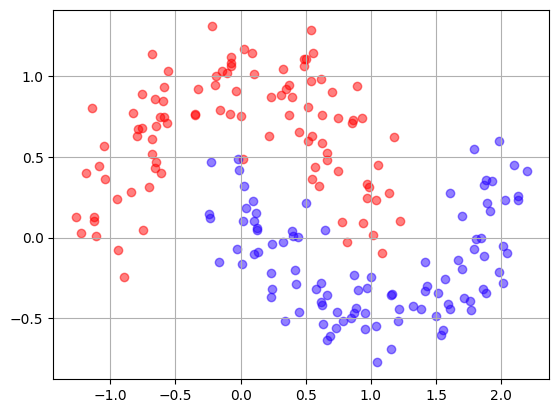

In [26]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(np.float64(0.514775), np.float64(0.485225))

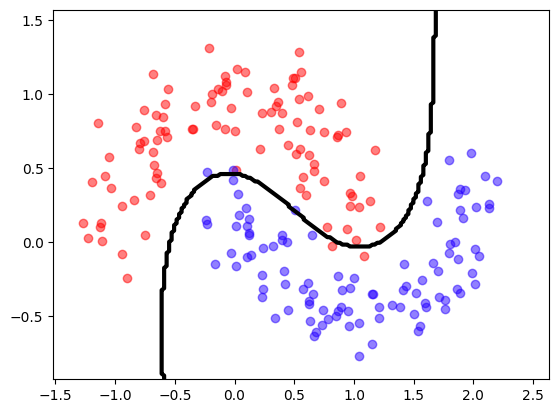

In [27]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [28]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [29]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

def fit_and_predict(estimator, X, y):
    assert len(X) == len(y), "X and y must have the same length"

    # Dividir los datos en dos mitades
    midpoint = len(X) // 2

    # Si la longitud es impar, la segunda mitad tendrá un elemento más
    X_train, y_train = X[:midpoint], y[:midpoint]
    X_test, y_test = X[midpoint:], y[midpoint:]

    # Ajustar el modelo
    estimator.fit(X_train, y_train)

    # Hacer predicciones sobre la segunda mitad
    predictions = estimator.predict(X_test)

    return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [30]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [31]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [32]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [45]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[7 6 0 8 8 4 0 4 7 1 8 4 1 4 4]


In [46]:
y_less_than_5 = y<5
print (y_less_than_5)

[False False  True False False  True  True  True False  True False  True
  True  True  True]


and how we can select elements of a vector using a boolean vector of the same length

In [47]:
y[y_less_than_5]

array([0, 4, 0, 4, 1, 4, 1, 4, 4])

In [36]:
y[y<5]

array([4, 1, 2, 1, 2, 4])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [37]:
v = np.random.randint(20, size=15)
v

array([ 3,  9, 12,  8,  0, 13,  5, 17, 11,  7, 19, 11, 10,  6,  3])

In [38]:
v[y<5]

array([ 3,  8, 17, 11,  7, 19])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [40]:
import numpy as np

def select_per_class(X, y):
    # Seleccionar las filas de X donde y es 0
    X1 = X[y == 0]

    # Seleccionar las filas de X donde y es 1
    X2 = X[y == 1]

    return X1, X2

check manually your code

In [41]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [42]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [48]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [49]:
import numpy as np

def accuracy(y_true, y_pred):
    # Verificar que los vectores tengan la misma longitud
    assert len(y_true) == len(y_pred), "Los vectores deben tener la misma longitud"

    # Comparar los vectores y contar cuántos son iguales
    matches = y_true == y_pred  # Devuelve un vector booleano
    correct_count = np.sum(matches)  # Cuenta cuántos son True

    # Calcular la precisión como un porcentaje
    result = correct_count / len(y_true)  # Dividir por la longitud del vector

    return result

In [50]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

np.float64(0.375)

**submit your code**

In [51]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [53]:


def split_fit_predict(estimator, X, y, train_pct):

    def split_data(X, y, pct):
        # your code here

    def accuracy(y_true, y_pred):
        # your code here

    Xtr, Xts, ytr, yts = ...
    ... fit the estimator ....
    preds_ts = ... obtain predictions ...
    return estimator, Xts, yts, accuracy(yts, preds_ts)



IndentationError: expected an indented block after function definition on line 3 (ipython-input-2890407184.py, line 6)

In [54]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons

def split_fit_predict(estimator, X, y, train_pct):
    # Función para dividir los datos
    def split_data(X, y, pct):
        total_samples = len(y)
        train_size = int(total_samples * pct)
        indices = np.random.permutation(total_samples)
        train_indices = indices[:train_size]
        test_indices = indices[train_size:]
        return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

    # Función para calcular la precisión
    def accuracy(y_true, y_pred):
        matches = y_true == y_pred
        correct_count = np.sum(matches)
        result = correct_count / len(y_true)
        return result

    # Dividir los datos
    Xtr, Xts, ytr, yts = split_data(X, y, train_pct)

    # Ajustar el estimador
    estimator.fit(Xtr, ytr)

    # Realizar predicciones sobre el conjunto de prueba
    preds_ts = estimator.predict(Xts)

    # Calcular la precisión
    return estimator, Xts, yts, accuracy(yts, preds_ts)

# Ejemplo de uso
X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
result = split_fit_predict(estimator, X, y, train_pct=0.9)

# Mostrar el resultado
print(result)


(LogisticRegression(), array([[-0.92770746,  0.17712226],
       [ 0.85036311, -0.45861136],
       [-0.06568304,  0.22698432],
       [-1.10027347,  0.00851229],
       [ 0.771668  , -0.54370581],
       [ 1.33408304, -0.07129127],
       [-0.48743493,  1.07643642],
       [-0.47805275,  1.00214473],
       [ 1.65577662,  0.08536538],
       [ 0.6217034 ,  0.63445817]]), array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0]), np.float64(0.9))


**submit your code**

In [55]:
student.submit_task(globals(), task_id="task_05");
